In [8]:
# Set Variables and Import

import pickle
import os
from matplotlib import pyplot as plt

root_folder = '/home/Medalia/BWimmer/Benedikt/04_SFB/04_AlphaFold/210924_mSFB_SLayer_candidates/AID45222/AID45222'

os.chdir(root_folder)

Working on model 1
Working on model 2
Working on model 3
Working on model 4
Working on model 5


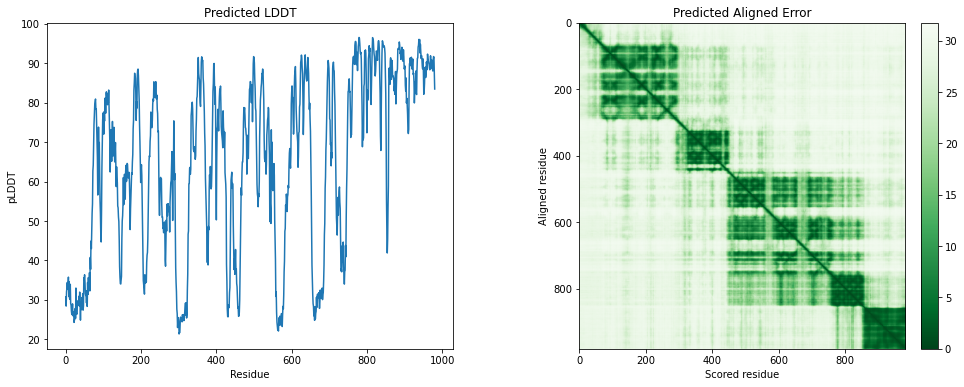

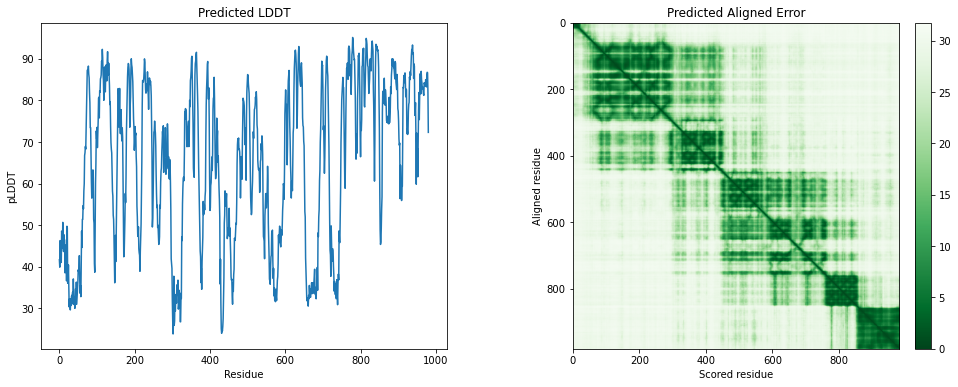

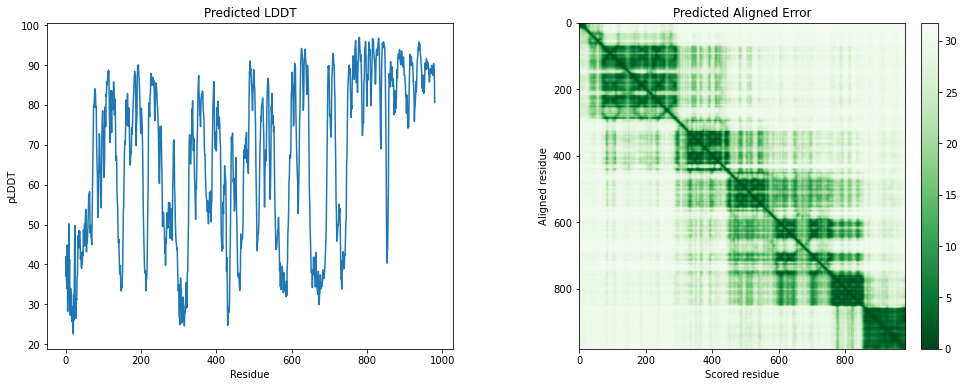

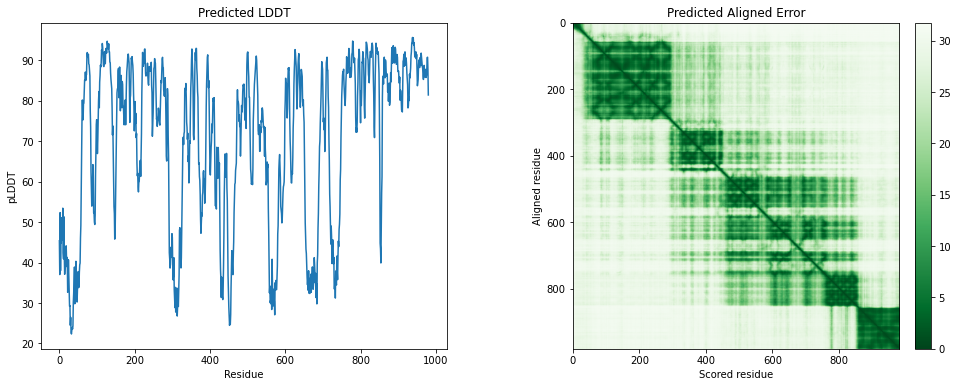

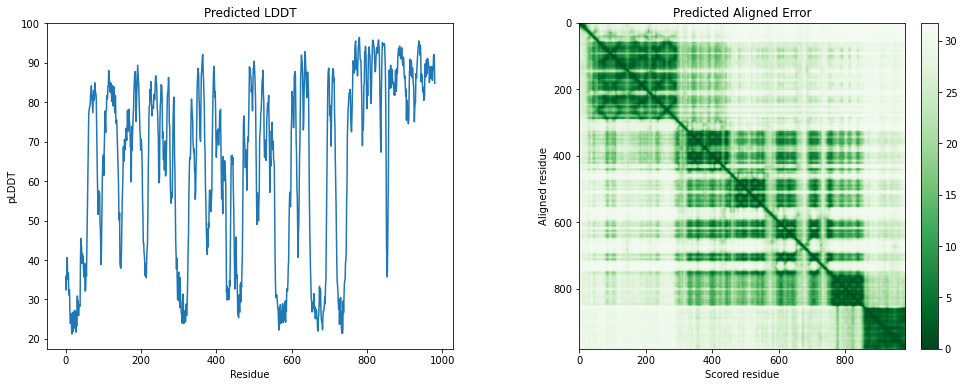

In [9]:
# Go through all models

for model in range(1,6,1):
    print(f"Working on model {model}")

    pklfile = "result_model_" + str(model) + "_ptm.pkl"
    exportfile = "plot_model_" + str(model) + ".pdf"
    
    with open(pklfile, 'rb') as f:
        data = pickle.load(f)
        
    data.keys()
    
    plddt = data["plddt"]

    plt.figure(figsize=[8 * 2, 6])
    plt.subplot(1, 2, 1)
    plt.plot(plddt)
    plt.title('Predicted LDDT')
    plt.xlabel('Residue')
    plt.ylabel('pLDDT')
     
    pae_output = (data['predicted_aligned_error'],
              data['max_predicted_aligned_error'])

    plt.subplot(1, 2, 2)
    pae, max_pae = pae_output
    plt.imshow(pae, vmin=0., vmax=max_pae, cmap='Greens_r')
    plt.colorbar(fraction=0.046, pad=0.04)

    plt.title('Predicted Aligned Error')
    plt.xlabel('Scored residue')
    plt.ylabel('Aligned residue')
    plt.savefig(exportfile)

In [10]:
# Check, which model has the highest confidence (mean pLDDT)

import json

with open('ranking_debug.json') as f:
  ranking_dict = json.load(f)

best_model = (ranking_dict['order'])[0]

plddts = dict(ranking_dict['plddts'])
              
model_no = int(best_model.split('_')[1])

print(f"The best model is {best_model} with a mean pLDDT of {plddts.get(best_model)}.")

The best model is model_4_ptm with a mean pLDDT of 70.17418865452743.


In [23]:
# Helper for visualization import

import pickle
import os

model_no = 4
path = "/Users/bwi/Downloads/4Pamela/AID44313"

os.chdir(path)
pklfile = "result_model_" + str(model_no) + "_ptm.pkl"
pdbfile = "relaxed_model_" + str(model_no) + "_ptm.pdb"

with open(pklfile, 'rb') as f:
    data = pickle.load(f)
    
with open(pdbfile) as ifile:
    system = "".join([x for x in ifile])

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

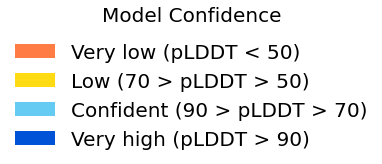

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

In [46]:
# Perform 3D Visualiazation of best model with py3Dmol

import py3Dmol

from matplotlib import gridspec
import matplotlib.pyplot as plt

from IPython import display
from ipywidgets import GridspecLayout
from ipywidgets import Output

plddt = data["plddt"]

PLDDT_BANDS = [(0, 50, '#FF7D45'),
               (50, 70, '#FFDB13'),
               (70, 90, '#65CBF3'),
               (90, 100, '#0053D6')]

view.addModelsAsFrames(system)

def plot_plddt_legend():
  """Plots the legend for pLDDT."""
  thresh = ['Very low (pLDDT < 50)',
            'Low (70 > pLDDT > 50)',
            'Confident (90 > pLDDT > 70)',
            'Very high (pLDDT > 90)']

  colors = [x[2] for x in PLDDT_BANDS]

  plt.figure(figsize=(2, 2))
  for c in colors:
    plt.bar(0, 0, color=c)
  plt.legend(thresh, frameon=False, loc='center', fontsize=20)
  plt.xticks([])
  plt.yticks([])
  ax = plt.gca()
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  plt.title('Model Confidence', fontsize=20, pad=20)
  return plt

# Show the structure coloured by chain if the multimer model has been used.

# Color the structure by per-residue pLDDT
color_map = {i: bands[2] for i, bands in enumerate(PLDDT_BANDS)}
view = py3Dmol.view(width=800, height=600)
view.addModelsAsFrames(to_visualize_pdb)
style = {'cartoon': {'colorscheme': {'prop': 'b', 'map': color_map}}}
#if show_sidechains:
#  style['stick'] = {}
view.setStyle({'model': -1}, style)
view.zoomTo()

grid = GridspecLayout(1, 2)
out = Output()
with out:
  view.show()
grid[0, 0] = out

out = Output()
with out:
  plot_plddt_legend().show()
grid[0, 1] = out

display.display(grid)